In [3]:
import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)

# Number of transactions
n_transactions = 10000

# Create features: Amount, Time, V1-V28 (simulated features)
amounts = np.random.uniform(low=0.0, high=5000.0, size=n_transactions)
times = np.random.uniform(low=0.0, high=1000.0, size=n_transactions)

# Simulate V1-V28 features (normally distributed)
features = np.random.normal(loc=0.0, scale=1.0, size=(n_transactions, 28))

# Create target variable (Class: 0 for genuine, 1 for fraudulent)
# Simulate fraud cases as 2% of total transactions
fraud_indices = np.random.choice(n_transactions, size=int(0.02 * n_transactions), replace=False)
labels = np.zeros(n_transactions)
labels[fraud_indices] = 1

# Create DataFrame
data = pd.DataFrame({
    'Time': times,
    'Amount': amounts,
    **{f'V{i}': features[:, i] for i in range(1, 28)},
    'Class': labels
})

# Save dataset to CSV
data.to_csv('credit_card_transactions.csv', index=False)

# Check the first few rows of the generated dataset
print(data.head())

         Time       Amount        V1        V2        V3        V4        V5  \
0  373.640818  1872.700594  0.585992  1.306280 -1.226916  1.712308 -0.128551   
1  332.912096  4753.571532  0.444875  0.642121 -0.759652 -1.023734  1.017174   
2  176.153913  3659.969709 -0.308257 -0.031934  1.432079 -0.300318 -1.178437   
3  607.266670  2993.292421  2.072599  1.904680 -0.006462  1.955326  1.488135   
4  476.624161   780.093202  0.460045  1.975705 -0.074818  1.112061  1.671354   

         V6        V7        V8  ...       V19       V20       V21       V22  \
0 -0.975021  0.757755 -0.446454  ... -1.196340 -2.316445  0.622861 -0.303863   
1 -0.990861 -0.606664  0.887309  ...  0.743010 -0.137165  0.787274  0.934274   
2 -0.417235  1.370792  0.070865  ...  1.569584  1.099416  1.881621  1.833114   
3 -0.450707 -2.009215 -0.217968  ... -1.224400 -0.281294 -0.118534 -0.514269   
4  1.027192 -0.016801  0.642108  ...  0.671260 -1.380390 -0.807278  1.365329   

        V23       V24       V25       

         Time       Amount        V1        V2        V3        V4        V5  \
0  373.640818  1872.700594  0.585992  1.306280 -1.226916  1.712308 -0.128551   
1  332.912096  4753.571532  0.444875  0.642121 -0.759652 -1.023734  1.017174   
2  176.153913  3659.969709 -0.308257 -0.031934  1.432079 -0.300318 -1.178437   
3  607.266670  2993.292421  2.072599  1.904680 -0.006462  1.955326  1.488135   
4  476.624161   780.093202  0.460045  1.975705 -0.074818  1.112061  1.671354   

         V6        V7        V8  ...       V19       V20       V21       V22  \
0 -0.975021  0.757755 -0.446454  ... -1.196340 -2.316445  0.622861 -0.303863   
1 -0.990861 -0.606664  0.887309  ...  0.743010 -0.137165  0.787274  0.934274   
2 -0.417235  1.370792  0.070865  ...  1.569584  1.099416  1.881621  1.833114   
3 -0.450707 -2.009215 -0.217968  ... -1.224400 -0.281294 -0.118534 -0.514269   
4  1.027192 -0.016801  0.642108  ...  0.671260 -1.380390 -0.807278  1.365329   

        V23       V24       V25       

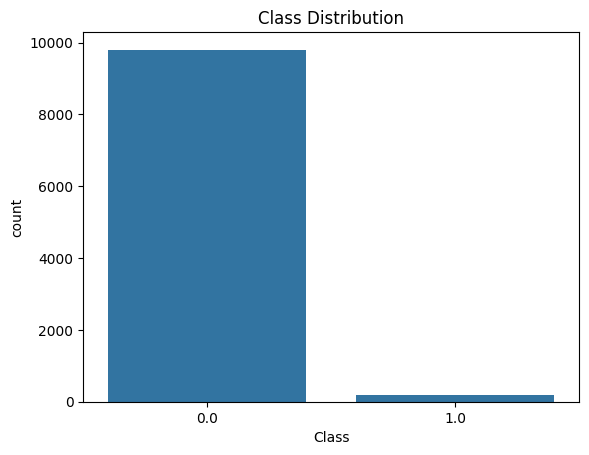

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74      1960
         1.0       0.02      0.50      0.05        40

    accuracy                           0.59      2000
   macro avg       0.50      0.55      0.39      2000
weighted avg       0.96      0.59      0.73      2000

Confusion Matrix:
[[1169  791]
 [  20   20]]


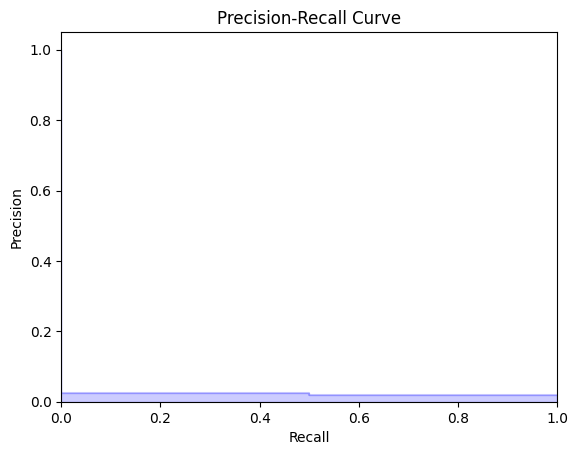

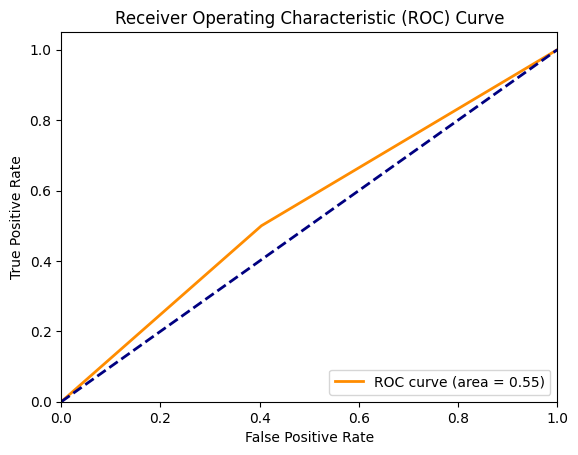

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Load the dataset
df = pd.read_csv('credit_card_transactions.csv')

# Explore the dataset
print(df.head())
print(df.info())

# Check class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Preprocessing and feature scaling
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Splitting data into train and test sets
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling class imbalance using oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Training logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()